# Trabalho Computacional II - Sistemas de Comunicações Digitais 2024.2

# Aluno: João Vitor de Oliveira Fraga

# Matrícula: 537377

Obs: As funções utilizadas nesse notebook estão no arquivo "DigitalCommunications.py", que está na pasta enviada


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from DigitalCommunications import *


# Questão 1

### Item a)

Dado que a energia média é dada por:

\begin{equation}
    E_m = \frac{1}{M}\sum |A_k|^2, \forall A_k \in \{A_0, A_1, A_2, ..., A_{M-1}\}
\end{equation}

Como temos quatro simbolos com módulo ao quadrado igual a $r_1$ e quatro símbolos com módulo ao quadrado igual a $r_2$, ficamos com:

\begin{equation}
    \frac{1}{8}\left( 4r_1^2 + 4r_2^2   \right) = \frac{r_1^2}{2} + \frac{r_1^2}{2}
\end{equation}

Indo agora para o código:

In [2]:
import sympy as sp

# Definindo r1 e r2 como variaveis simbolicas
r1 = sp.symbols('r1') 
r2 = sp.symbols('r2')

num_r1 = 4 # Número de simbolos com magnitude igual a r_1
num_r2 = 4 # Número de simbolos com magnitude igual a r_2

# Cálculo da energia média
Em = (num_r1 * r1**2 + num_r2 * r2**2)/8

# Mostrando o resultado
print("Energia média (Em) simbólica:")
sp.pprint(Em)

Energia média (Em) simbólica:
  2     2
r₁    r₂ 
─── + ───
 2     2 


### Item c)

Considerando os valores $r_1 = 1$ e $r_2 = \sqrt{2}$, nosso alfabeto terá as seguintes posições: $A = A = \left\{ (\frac{\sqrt{2}}{2} + j\frac{\sqrt{2}}{2}), (-\frac{\sqrt{2}}{2} + j\frac{\sqrt{2}}{2}), (-\frac{\sqrt{2}}{2} - j\frac{\sqrt{2}}{2}), (\frac{\sqrt{2}}{2} - j\frac{\sqrt{2}}{2}), (\sqrt{2} + j0), (0 + j\sqrt{2}), (-\sqrt{2} + j0), (0 - j\sqrt{2}) \right\}$

In [10]:
# Definindo um vetor com os valores dos simbolos
constellation_values = np.array([
    (np.sqrt(2)/2 + 1j*np.sqrt(2)/2),
    (-np.sqrt(2)/2 + 1j*np.sqrt(2)/2),
    (-np.sqrt(2)/2 - 1j*np.sqrt(2)/2),
    (np.sqrt(2)/2 - 1j*np.sqrt(2)/2),
    (np.sqrt(2) + 0j),
    (0 + 1j*np.sqrt(2)),
    (-np.sqrt(2) + 0j),
    (0 - 1j*np.sqrt(2))
])

M = 8 # Número de símbolos na constelação
snr_range = np.arange(0, 22, 2) # Range de SNR em dB

# Gerando uma sequência aleatória de bits
bits = np.random.randint(0, 2, 264000)

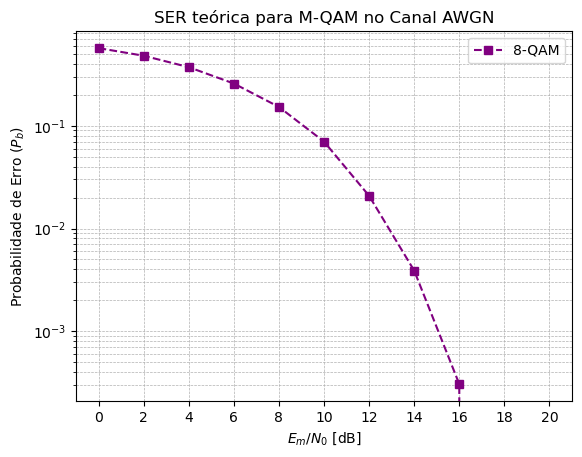

In [11]:

# Geração de símbolos a partir dos bits
n_bits_per_symbol = int(np.log2(M))
num_symbols = len(bits) // n_bits_per_symbol
symbols_index = np.random.randint(0, len(constellation_values), num_symbols)  # Simulando mapeamento aleatório
modulated_symbols = constellation_values[symbols_index]  # Obtendo a sequência modulada

error_prob_prat_qam = [] 


SER_QAM, BER_QAM, symbols_rx = getSERandBER_defined(bits, M, snr_range, modulated_symbols)
error_prob_prat_qam.append(SER_QAM)

plt.figure()
plt.semilogy(snr_range, error_prob_prat_qam[0], '--s', label=f'{M}-QAM', color='purple')


# Configurações do gráfico
plt.xlabel('$E_m / N_0$ [dB]')
plt.ylabel('Probabilidade de Erro ($P_b$)')
plt.title('SER teórica para M-QAM no Canal AWGN')
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.xticks(snr_range)
plt.show()

### Item d)

Para $r_1 = r_2 = 1$ nós temos uma constelação 8-PSK, e sabemos que a fórmula é dada por:

$P_e \approx 2 Q \left(\sqrt{\frac{2E}{N_0}}sen(\frac{\pi}{M})\right)$, onde $\frac{E}{N_0} = SNR$

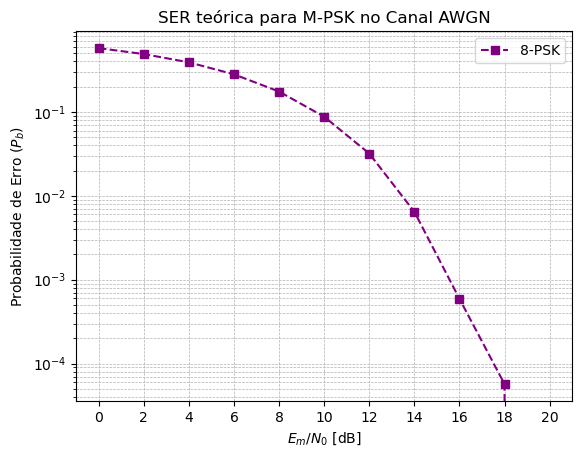

In [12]:
error_prob_prat_psk = [] 


SER_psk, BER_psk = getSERandBER(bits, M, snr_range, 'psk')
error_prob_prat_psk.append(SER_psk)

plt.figure()
plt.semilogy(snr_range, error_prob_prat_psk[0], '--s', label=f'{M}-PSK', color='purple')


# Configurações do gráfico
plt.xlabel('$E_m / N_0$ [dB]')
plt.ylabel('Probabilidade de Erro ($P_b$)')
plt.title('SER teórica para M-PSK no Canal AWGN')
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.xticks(snr_range)
plt.show()